In [1]:
import sys
sys.path.insert(1, '..')
import importlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

## Load Data

In [2]:
df = pd.read_csv('../data/kidney-exchange/survey2_data.csv')
df.columns

Index(['1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '2x3', '2x4', '2x5',
       '2x6', '2x7', '2x8', '3x4', '3x5', '3x6', '3x7', '3x8', '4x5', '4x6',
       '4x7', '4x8', '5x6', '5x7', '5x8', '6x7', '6x8', '7x8',
       'Voter Strategy 0', '2x1', '3x1', '4x1', '5x1', '6x1', '7x1', '8x1',
       '3x2', '4x2', '5x2', '6x2', '7x2', '8x2', '4x3', '5x3', '6x3', '7x3',
       '8x3', '5x4', '6x4', '7x4', '8x4', '6x5', '7x5', '8x5', '7x6', '8x6',
       '8x7', 'Voter Strategy 1'],
      dtype='object')

Number of pairwise comparisons per voter? Easy - just as many as the number of unique voters.

Save the various voter strategies for later, if necessary:

In [3]:
strategies = df["Voter Strategy 0"].fillna('') + df["Voter Strategy 1"].fillna('')
strategies

0                          The younger of the 2 patients
1      i went with the person who i consider to be th...
2      I prioritized age first then how much they dri...
3      Age was most important, then alcohol consumpti...
4      I defaulted to the priority of younger, no ski...
                             ...                        
284    I would like to give a kidney to a young patie...
285    I always gave it to the younger person. If the...
286    I went with my gut feeling on what felt right ...
287    age first.     No other major health problems ...
288    I mostly looked at how much alcohol the person...
Length: 289, dtype: object

In [4]:
df_0 = df[[
    '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '2x3', '2x4', '2x5', '2x6', '2x7', '2x8', '3x4', 
    '3x5', '3x6', '3x7', '3x8', '4x5', '4x6', '4x7', '4x8', '5x6', '5x7', '5x8', '6x7', '6x8', '7x8'
]].dropna()
df_1 = df[[
    '2x1', '3x1', '4x1', '5x1', '6x1', '7x1', '8x1', '3x2', '4x2', '5x2', '6x2', '7x2', '8x2', '4x3', 
    '5x3', '6x3', '7x3', '8x3', '5x4', '6x4', '7x4', '8x4', '6x5', '7x5', '8x5', '7x6', '8x6', '8x7', 
]].dropna()
df_0

,1x2,1x3,1x4,1x5,1x6,1x7,1x8,2x3,2x4,2x5,...,4x5,4x6,4x7,4x8,5x6,5x7,5x8,6x7,6x8,7x8
3,"Patient W.A. is 30 years old, had 1 alcoholic ...","Patient W.A. is 30 years old, had 1 alcoholic ...","Patient W.A. is 30 years old, had 1 alcoholic ...","Patient W.A. is 30 years old, had 1 alcoholic ...","Patient W.A. is 30 years old, had 1 alcoholic ...","Patient W.A. is 30 years old, had 1 alcoholic ...","Patient W.A. is 30 years old, had 1 alcoholic ...","Patient J.B. is 30 years old, had 1 alcoholic ...","Patient V.S. is 30 years old, had 5 alcoholic ...","Patient V.S. is 30 years old, had 5 alcoholic ...",...,"Patient K.D. is 30 years old, had 5 alcoholic ...","Patient K.D. is 30 years old, had 5 alcoholic ...","Patient K.D. is 30 years old, had 5 alcoholic ...","Patient K.D. is 30 years old, had 5 alcoholic ...","Patient Y.D. is 70 years old, had 1 alcoholic ...","Patient Y.D. is 70 years old, had 1 alcoholic ...","Patient Y.D. is 70 years old, had 1 alcoholic ...","Patient M.K. is 70 years old, had 1 alcoholic ...","Patient J.F. is 70 years old, had 5 alcoholic ...","Patient M.K. is 70 years old, had 1 alcoholic ..."
5,"Patient W.A. is 30 years old, had 1 alcoholic ...","Patient W.A. is 30 years old, had 1 alcoholic ...","Patient W.A. is 30 years old, had 1 alcoholic ...","Patient W.A. is 30 years old, had 1 alcoholic ...","Patient W.A. is 30 years old, had 1 alcoholic ...","Patient W.A. is 30 years old, had 1 alcoholic ...","Patient W.A. is 30 years old, had 1 alcoholic ...","Patient V.S. is 30 years old, had 5 alcoholic ...","Patient V.S. is 30 years old, had 5 alcoholic ...","Patient V.S. is 30 years old, had 5 alcoholic ...",...,"Patient K.D. is 30 years old, had 5 alcoholic ...","Patient K.D. is 30 years old, had 5 alcoholic ...","Patient K.D. is 30 years old, had 5 alcoholic ...","Patient K.D. is 30 years old, had 5 alcoholic ...","Patient Y.D. is 70 years old, had 1 alcoholic ...","Patient Y.D. is 70 years old, had 1 alcoholic ...","Patient Y.D. is 70 years old, had 1 alcoholic ...","Patient M.K. is 70 years old, had 1 alcoholic ...","Patient J.F. is 70 years old, had 5 alcoholic ...","Patient M.K. is 70 years old, had 1 alcoholic ..."
6,"Patient W.A. is 30 years old, had 1 alcoholic ...","Patient W.A. is 30 years old, had 1 alcoholic ...","Patient W.A. is 30 years old, had 1 alcoholic ...","Patient W.A. is 30 years old, had 1 alcoholic ...","Patient W.A. is 30 years old, had 1 alcoholic ...","Patient W.A. is 30 years old, had 1 alcoholic ...","Patient W.A. is 30 years old, had 1 alcoholic ...","Patient J.B. is 30 years old, had 1 alcoholic ...","Patient K.D. is 30 years old, had 5 alcoholic ...","Patient V.S. is 30 years old, had 5 alcoholic ...",...,"Patient K.D. is 30 years old, had 5 alcoholic ...","Patient K.D. is 30 years old, had 5 alcoholic ...","Patient K.D. is 30 years old, had 5 alcoholic ...","Patient K.D. is 30 years old, had 5 alcoholic ...","Patient Y.D. is 70 years old, had 1 alcoholic ...","Patient Y.D. is 70 years old, had 1 alcoholic ...","Patient Y.D. is 70 years old, had 1 alcoholic ...","Patient J.F. is 70 years old, had 5 alcoholic ...","Patient R.F. is 70 years old, had 5 alcoholic ...","Patient M.K. is 70 years old, had 1 alcoholic ..."
10,"Patient W.A. is 30 years old, had 1 alcoholic ...","Patient J.B. is 30 years old, had 1 alcoholic ...","Patient K.D. is 30 years old, had 5 alcoholic ...","Patient W.A. is 30 years old, had 1 alcoholic ...","Patient W.A. is 30 years old, had 1 alcoholic ...","Patient W.A. is 30 years old, had 1 alcoholic ...","Patient W.A. is 30 years old, had 1 alcoholic ...","Patient J.B. is 30 years old, had 1 alcoholic ...","Patient K.D. is 30 years old, had 5 alcoholic ...","Patient V.S. is 30 years old, had 5 alcoholic ...",...,"Patient K.D. is 30 years old, had 5 alcoholic ...","Patient K.D. is 30 years old, had 5 alcoholic ...","Patient K.D. is 30 years old, had 5 alcoholic ...","Patient K.D. is 30 years old, had 5 alcoholic ...","Patient Y.D. is 70 years old, had 1 alcoh

In [5]:
print(df_0.shape[0])
print(df_1.shape[0])
print(df.shape[0])

141
148
289


## Preprocessing

1. Hardcode the patient profiles.
2. Replace each pairwise comparison with the actual patient features, and translate the label. Preserve exogenous features.

### Patient Profiles
- ID: patient #
- Age: age in years
- Alcohol consumption: number of drinks per day
- Skin cancer in remission: whether or not the patient has skin cancer in remission

In [6]:
features_endo = ["ID", "Abbrv.", "Initials", "Age", "AlcoholConsumption", "SkinCancer"]
patients = pd.DataFrame([
    [1, "YRH", "W.A.", 30, 1, 0],
    [2, "YFH", "V.S.", 30, 5, 0],
    [3, "YRC", "J.B.", 30, 1, 1],
    [4, "YFC", "K.D.", 30, 5, 1],
    [5, "ORH", "Y.D.", 70, 1, 0],
    [6, "OFH", "J.F.", 70, 5, 0],
    [7, "ORC", "M.K.", 70, 1, 1],
    [8, "OFC", "R.F.", 70, 5, 1]
], columns=features_endo)
features_endo.remove("Abbrv.")
patients

,ID,Abbrv.,Initials,Age,AlcoholConsumption,SkinCancer
0,1,YRH,W.A.,30,1,0
1,2,YFH,V.S.,30,5,0
2,3,YRC,J.B.,30,1,1
3,4,YFC,K.D.,30,5,1
4,5,ORH,Y.D.,70,1,0
5,6,OFH,J.F.,70,5,0
6,7,ORC,M.K.,70,1,1
7,8,OFC,R.F.,70,5,1


### Transformation

In [75]:
from collections import namedtuple
import re

rows = []
regexp = re.compile(r'^Patient ([A-Z.]{4})')
for df in [df_0, df_1]:
    for column in df.columns:
        choices_num = [int(x) for x in column.split("x")]
        choices = patients[patients["ID"]\
            .isin(choices_num)]\
            .sort_values("ID", ascending=(choices_num[0] < choices_num[1]))\
            .reset_index()
        for i, choice in enumerate(df[column].values):
            row = {
                "{}_{}".format(f, s): choices[f].iloc[s]
                for f in choices.columns for s in range(2)
            }
            row['VoterID'] = i
            chosen_initials = regexp.search(choice).group(1)
            row['Chosen'] = choices.index[choices["Initials"] == chosen_initials][0]
            rows.append(row)

df_pairwise = pd.DataFrame(rows).set_index([df_pairwise.index, 'VoterID'])
df_pairwise

,,index_0,index_1,ID_0,ID_1,Abbrv._0,Abbrv._1,Initials_0,Initials_1,Age_0,Age_1,AlcoholConsumption_0,AlcoholConsumption_1,SkinCancer_0,SkinCancer_1,Chosen
,VoterID,,,,,,,,,,,,,,,
0,0,0,1,1,2,YRH,YFH,W.A.,V.S.,30,30,1,5,0,0,0
1,1,0,1,1,2,YRH,YFH,W.A.,V.S.,30,30,1,5,0,0,0
2,2,0,1,1,2,YRH,YFH,W.A.,V.S.,30,30,1,5,0,0,0
3,3,0,1,1,2,YRH,YFH,W.A.,V.S.,30,30,1,5,0,0,0
4,4,0,1,1,2,YRH,YFH,W.A.,V.S.,30,30,1,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8087,143,7,6,8,7,OFC,ORC,R.F.,M.K.,70,70,5,1,1,1,1
8088,144,7,6,8,7,OFC,ORC,R.F.,M.K.,70,70,5,1,1,1,1
8089,145,7,6,8,7,OFC,ORC,R.F.,M.K.,70,70,5,1,1,1,1


In [76]:
features = ["{}_{}".format(f, s) for f in features_endo for s in range(2) if f != "ID" and f != "Initials"]
num_features = features
cat_features = []
features

['Age_0',
 'Age_1',
 'AlcoholConsumption_0',
 'AlcoholConsumption_1',
 'SkinCancer_0',
 'SkinCancer_1']

In [77]:
df_pairwise.columns

Index(['index_0', 'index_1', 'ID_0', 'ID_1', 'Abbrv._0', 'Abbrv._1',
       'Initials_0', 'Initials_1', 'Age_0', 'Age_1', 'AlcoholConsumption_0',
       'AlcoholConsumption_1', 'SkinCancer_0', 'SkinCancer_1', 'Chosen'],
      dtype='object')

In [78]:
df_proc = df_pairwise.loc[:,features + ["Chosen"]]
# convert to numeric, changing literals to NaN
for f in num_features:
    df_proc.loc[:,f] = pd.to_numeric(df_proc.loc[:,f], errors='coerce')
df_proc.head()

,,Age_0,Age_1,AlcoholConsumption_0,AlcoholConsumption_1,SkinCancer_0,SkinCancer_1,Chosen
,VoterID,,,,,,,
0,0,30,30,1,5,0,0,0
1,1,30,30,1,5,0,0,0
2,2,30,30,1,5,0,0,0
3,3,30,30,1,5,0,0,0
4,4,30,30,1,5,0,0,0


In [99]:
df_proc.describe()

,Age_0,Age_1,AlcoholConsumption_0,AlcoholConsumption_1,SkinCancer_0,SkinCancer_1,Chosen
count,8092.000000,8092.000000,8092.000000,8092.000000,8092.000000,8092.000000,8092.000000
mean,50.276817,49.723183,3.006920,2.993080,0.503460,0.496540,0.500247
std,19.999320,19.999320,2.000112,2.000112,0.500019,0.500019,0.500031
min,30.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,70.000000,30.000000,5.000000,1.000000,1.000000,0.000000,1.000000
75%,70.000000,70.000000,5.000000,5.000000,1.000000,1.000000,1.000000
max,70.000000,70.000000,5.000000,5.000000,1.000000,1.000000,1.000000


### Train/Test Split

In [100]:
import hmm.classification
importlib.reload(hmm.classification)
from hmm.classification import train_test_val_dev_split

X = df_proc.drop(labels=["Chosen"], axis='columns', inplace=False)
y = df_proc["Chosen"]
X_train, X_test, X_val, X_dev, y_train, y_test, y_val, y_dev = train_test_val_dev_split(X, y)
display(X_train.head())
display(y_train.head())

,,Age_0,Age_1,AlcoholConsumption_0,AlcoholConsumption_1,SkinCancer_0,SkinCancer_1
,VoterID,,,,,,
2160,45,30,70,1,5,1,0
1658,107,30,70,5,1,0,1
6927,19,70,30,1,5,1,1
5643,67,70,30,1,5,1,0
4375,131,30,30,5,1,1,0


      VoterID
2160  45         0
1658  107        1
6927  19         0
5643  67         1
4375  131        1
Name: Chosen, dtype: int64

### Labeling Model

What labeling functions to write?

In [81]:
strategies.sample().values

array(['My first priority went to age, with overall health and drinks per day as tiebreakers if they were the same age.'],
      dtype=object)

In [82]:
import hmm.labeling.kidney_exchange as ke
import hmm.labeling.models
import hmm.labeling.utils
importlib.reload(hmm.labeling.kidney_exchange)
importlib.reload(hmm.labeling.models)
importlib.reload(hmm.labeling.utils)

from hmm.labeling.models import Labeler
from snorkel.labeling import LFAnalysis

lfs = [
    ke.age,
    ke.alcohol,
    ke.health
]

labeler = Labeler(lfs)
L_train, L_dev, L_val = labeler.label([X_train, X_dev, X_val])
LFAnalysis(L=L_dev, lfs=lfs).lf_summary(Y=y_dev.values).sort_values("Correct", ascending=False)

/opt/miniconda3/envs/hmm/lib/python3.7/site-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 1295/1295 [00:00<00:00, 6563.25it/s]


,j,Polarity,Coverage,Overlaps,Conflicts,Correct,Incorrect,Emp. Acc.
age,0,"[0, 1]",0.537037,0.395062,0.219136,153,21,0.879310
alcohol,1,"[0, 1]",0.567901,0.432099,0.231481,145,39,0.788043
health,2,"[0, 1]",0.549383,0.376543,0.194444,131,47,0.735955


*Experiment: LF Analysis*

In [83]:
# using the validation set (since tuning is done)
analysis = LFAnalysis(L=L_val, lfs=lfs).lf_summary(Y=y_val.values)
analysis.to_csv("../figures/data/ke-lfanalysis.csv")
# labeling density
pd.DataFrame(L_dev, columns=[lf.name for lf in lfs]).to_csv("../figures/data/ke-density.csv")

## Aggregation

In [84]:
from snorkel.labeling import MajorityLabelVoter

model_majority = MajorityLabelVoter()
preds_train = model_majority.predict(L=L_train)

*Experiment: LF weighting*

In [85]:
# cardinality is num classes
importlib.reload(hmm.labeling.models)

model_label = labeler.fit(L_train, Y_dev=y_dev.values, fit_params={'n_epochs': 200, 'log_freq': 50})
analysis = LFAnalysis(L=L_val, lfs=lfs).lf_summary(Y=y_val.values)
analysis['weight'] = pd.Series(model_label.get_weights(), index=[lf.name for lf in lfs])
analysis.to_csv('../figures/data/ke-weights.csv')
analysis.sort_values('Emp. Acc.')

,j,Polarity,Coverage,Overlaps,Conflicts,Correct,Incorrect,Emp. Acc.,weight
health,2,"[0, 1]",0.562934,0.444015,0.272587,445,284,0.610425,0.610575
alcohol,1,"[0, 1]",0.568340,0.423166,0.253282,580,156,0.788043,0.609677
age,0,"[0, 1]",0.605405,0.450193,0.272587,652,132,0.831633,0.612396


In [86]:
importlib.reload(hmm.labeling.models)
from hmm.labeling.models import Labeler

for model in [model_majority, model_label]:
    Labeler.score(model, L_val, y_val)

MajorityLabelVoter() Vote Accuracy:            80.2
LabelModel() Vote Accuracy:            80.2


## Baselining

Now, compare our accuracy to Freedman et al. 

In [87]:
profile_scores = pd.DataFrame({
    'j': [1, 3, 2, 5, 4, 7, 6, 8],
    'direct': [1, .236280167, 0.103243396, 0.070045054, 0.035722844, 0.024072427, 0.011349772, 0.002769801],
    'attribute-based': [1, 0.13183083, 0.29106507, 0.03837135, 0.08900390, 0.01173346, 0.02590593, 0.00341520]
})
patient_scores = patients.set_index('ID').join(profile_scores.set_index('j'))

def get_profile_score(x, attribute=False):
    # return the profile matching this patient's profile\
    x.index = [l.split("_")[0] for l in x.index]
    profile = patient_scores[
        (patient_scores['Age'] == x['Age']) & (patient_scores['AlcoholConsumption'] == x['AlcoholConsumption']) & (patient_scores['SkinCancer'] == x['SkinCancer'])
    ].reset_index()
    return profile.loc[0, 'direct' if not attribute else 'attribute-based']

def classify_weighted(x):
    return np.argmax([get_profile_score(x[[c for c in X_train.columns if c.split("_")[1] == str(i)]]) for i in range(2)])

patient_scores

,Abbrv.,Initials,Age,AlcoholConsumption,SkinCancer,direct,attribute-based
ID,,,,,,,
1,YRH,W.A.,30,1,0,1.000000,1.000000
2,YFH,V.S.,30,5,0,0.103243,0.291065
3,YRC,J.B.,30,1,1,0.236280,0.131831
4,YFC,K.D.,30,5,1,0.035723,0.089004
5,ORH,Y.D.,70,1,0,0.070045,0.038371
6,OFH,J.F.,70,5,0,0.011350,0.025906
7,ORC,M.K.,70,1,1,0.024072,0.011733
8,OFC,R.F.,70,5,1,0.002770,0.003415


In [69]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true=y_val.values, y_pred=X_val.apply(classify_weighted, axis=1))

0.8532818532818532

## Classification

In [70]:
import hmm.classification
importlib.reload(hmm.classification)
from hmm.classification import Classifier
from sklearn.model_selection import KFold

clfa = Classifier(features, num_features, cat_features)
kf = KFold(n_splits=10, shuffle=True, random_state=11)

def kf_cross_val(kf, X_n, y_n):
    gold_acc = []
    lm_acc = []
    freedman_acc = []
    
    for i_train, i_test in kf.split(X_n):
        # train/test split by fold
        X_train_n, X_test_n = X_n.iloc[i_train], X_n.iloc[i_test]
        y_train_n, y_test_n = y_n.iloc[i_train], y_n.iloc[i_test]
        
        # gold accuracy
        clf.fit(X_train_n, y_train_n)
        gold_acc.append(clf.score(X_test_n, y_test_n, verbose=False))
        
        # lm accuracy
        ## train label model
        labeler = Labeler(lfs)
        L_train_n = labeler.label(X_train_n, verbose=False)
        labeler.fit(L_train_n, Y_dev=y_train_n)
        ## label points in X_train
        X_train_filtered_n, probs_train_filtered_n = labeler.filter_probs(X_train_n, L_train_n)
        preds_train_filtered_n = Labeler.probs_to_preds(probs_train_filtered_n)
        ## fit and score
        clf.fit(X_train_filtered_n, preds_train_filtered_n)
        lm_acc.append(clf.score(X_test_n, y_test_n, verbose=False))
        
        freedman_acc.append(accuracy_score(y_true=y_test_n.values, y_pred=X_test_n.apply(classify_weighted, axis=1)))
        
    return gold_acc, lm_acc, freedman_acc

gold_acc, lm_acc, freedman_acc = kf_cross_val(kf, X, y)

### Training on Gold Labels

Using just the labels (no label model):

In [71]:
def print_score_interval(accs):
    print("{} +/- {}".format(np.mean(accs), np.std(accs)))

print_score_interval(gold_acc)

0.8615931877489356 +/- 0.013614661898566778


### Training on Heuristic Labels

Using the label model, filter out unlabeled points:

In [72]:
print_score_interval(lm_acc)

0.8111742892459827 +/- 0.008013655899455515


### Baseline

In [73]:
print_score_interval(freedman_acc)

0.8589978482809139 +/- 0.012692274871420878


## Experiments

*Experiment: Accuracy by Sample Size*

In [48]:
clf = Classifier(features, num_features, cat_features)
results = []
kf = KFold(n_splits=5, shuffle=True, random_state=11)

for n in list(range(50, 1000, 10))+list(range(1100,8100,100)):
    sample = X.sample(n).index
    X_n = X.loc[sample]
    y_n = y.loc[sample]
    
    gold_acc, lm_acc, freedman_acc = kf_cross_val(kf, X_n, y_n)
    
    # store results
    res = (n, np.mean(gold_acc), np.std(gold_acc), np.mean(lm_acc), np.std(lm_acc), np.mean(freedman_acc), np.std(freedman_acc))
    print(res)
    results.append(res)
pd.DataFrame(results, columns=["n_rows", "acc_gold", "std_gold", "acc_heuristic", "std_heuristic", "acc_freedman", "std_freedman"]).to_csv("../figures/data/ke-accs_data.csv")

(50, 0.54, 0.07999999999999999, 0.6, 0.260768096208106, 0.68, 0.07483314773547885)
(60, 0.8, 0.11303883305208781, 0.7833333333333333, 0.1545603082582617, 0.9166666666666667, 0.05270462766947298)
(70, 0.8714285714285713, 0.0534522483824849, 0.7857142857142858, 0.10101525445522107, 0.9285714285714285, 0.04517539514526258)
(80, 0.8375, 0.08477912478906585, 0.825, 0.10752906583803283, 0.925, 0.06123724356957945)
(90, 0.9111111111111111, 0.04444444444444447, 0.7666666666666667, 0.11331154474650632, 0.9333333333333332, 0.041573970964154924)
(100, 0.9, 0.06324555320336755, 0.8, 0.1, 0.93, 0.05099019513592784)
(110, 0.8636363636363636, 0.07606000241218869, 0.8, 0.08430562268632459, 0.9272727272727274, 0.0222680885707562)
(120, 0.8833333333333334, 0.04082482904638627, 0.8083333333333333, 0.07728015412913088, 0.925, 0.048591265790377515)
(130, 0.9307692307692308, 0.044853476114194636, 0.8076923076923077, 0.07692307692307694, 0.923076923076923, 0.042132504423474326)
(140, 0.8428571428571429, 0.05

*Experiment: Accuracy by Number of Voters*

## Testing N=1##
## Testing N=2##
## Testing N=3##
## Testing N=4##
## Testing N=5##
## Testing N=6##
## Testing N=7##
## Testing N=8##
## Testing N=9##
## Testing N=10##
## Testing N=11##
## Testing N=12##
## Testing N=13##
## Testing N=14##
## Testing N=15##
## Testing N=16##
## Testing N=17##
## Testing N=18##
## Testing N=19##
## Testing N=20##
## Testing N=21##
## Testing N=22##
## Testing N=23##
## Testing N=24##
## Testing N=25##
## Testing N=26##
## Testing N=27##
## Testing N=28##
## Testing N=29##
## Testing N=30##
## Testing N=31##
## Testing N=32##
## Testing N=33##
## Testing N=34##
## Testing N=35##
## Testing N=36##
## Testing N=37##
## Testing N=38##
## Testing N=39##
## Testing N=40##
## Testing N=41##
## Testing N=42##
## Testing N=43##
## Testing N=44##
## Testing N=45##
## Testing N=46##
## Testing N=47##
## Testing N=48##
## Testing N=49##
## Testing N=50##
## Testing N=51##
## Testing N=52##
## Testing N=53##
## Testing N=54##
## Testing N=55##
## Testing N=56##
#

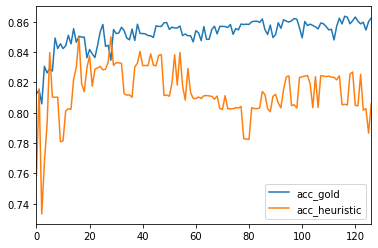

In [108]:
from sklearn.model_selection import train_test_split

data = []
users = df_proc.groupby(['VoterID'])
a = np.arange(users.ngroups)
np.random.shuffle(a)
for i in range(1,128):
    n = i
    print("## Testing N={}##".format(n))
    n_respondents = df_proc[users.ngroup().isin(a[:n])]
    train_index = n_respondents.groupby(level='VoterID').apply(lambda x: x.sample(20)).reset_index(level=0).index

    X_train, y_train = X.loc[train_index], y.loc[train_index]
    X_test, y_test = X.loc[~X.index.isin(train_index)], y.loc[~y.index.isin(train_index)]
    
    acc_gold = []
    acc_lm = []
    for i in range(10):
        L_train, L_test = labeler.label([X_train, X_test], verbose=False)
        lm = labeler.fit(L_train)
        Labeler.score(lm, L_test, y_test, verbose=False)
        X_train_filtered, probs_train_filtered = labeler.filter_probs(X_train, L_train)

        # baseline gold model accuracy
        clf.fit(X_train, y_train)
        acc_gold.append(clf.score(X_test, y_test, verbose=False))

        # label model accuracy
        preds_train_filtered = Labeler.probs_to_preds(probs_train_filtered)
        clf.fit(X_train_filtered, preds_train_filtered)
        acc_lm.append(clf.score(X_test, y_test, verbose=False))

    data.append((n, np.mean(acc_gold), np.std(acc_gold), np.mean(acc_lm), np.std(acc_lm)))
accs = pd.DataFrame(data, columns=["n_voters", "acc_gold", "std_gold", "acc_heuristic", "std_heuristic"])
accs.to_csv("../figures/data/ke-accs_voters.csv")
accs[['acc_gold', 'acc_heuristic']].plot()

*Experiment: LF perturbations*

CURRENTLY DEPRECATED - DOESN'T WORK FOR <4 HEURISTIC FUNCTIONS.

In [62]:
# baseline model
labeler = Labeler(lfs)
L_train, L_val = labeler.label([X_train, X_val], verbose=False)
model_label = labeler.fit(L_train, Y_dev=y_train)
acc_full = Labeler.score(model_label, L_val, y_val)
# perturbed models
lf_diffs = []
for lf in lfs:
    lfs_perturb = [l for l in lfs if l != lf]
    l = Labeler(lfs_perturb)
    L_train, L_val = l.label([X_train, X_val], verbose=False)
    lm = labeler.fit(L_train)
    acc_perturb = Labeler.score(lm, L_val, y_val, verbose=False)
    lf_diffs.append((lf.name, acc_full - acc_perturb))
    print("{}: {}".format(lf.name, acc_full - acc_perturb))
pd.DataFrame(lf_diffs, columns=['heuristic', 'value_added']).to_csv("../figures/data/ke-perturb.csv")

LabelModel() Vote Accuracy:            81.3


ValueError: L_train should have at least 3 labeling functions